<a href="https://colab.research.google.com/github/aisha041/3rd-Sem-Codes/blob/master/simulation_dlrm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

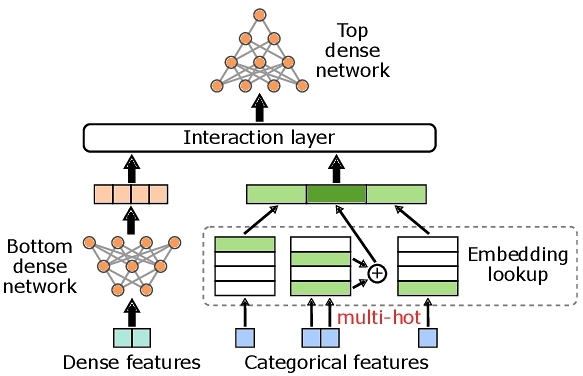

# Simulate Raw Recommendation data

In [ ]:
import numpy as np

users=["aisha","fatima","ravi"]
items=["book","laptop","phone"]

ratings=np.array([
    [5,None,2],
    [None,4,None],
    [1,3,None]
],dtype=object)

print("Ratings Matrix:")
print(ratings)

Ratings Matrix:
[[5 None 2]
 [None 4 None]
 [1 3 None]]


In [ ]:
user_to_id={'aisha': 0,"fatima":1, "ravi":2}
item_to_id={"book":0 ,"laptop":1,"phone":2}

#One-hot encode users and items IDs

In [ ]:
#one-hot encode user:0

def encode(user_no,no_of_user):

    user_encode=np.zeros(no_of_user)
    user_encode[user_no]=1
    return user_encode

In [ ]:
user_0_encode=encode(0,3)

#Building embedding tables fro users and items

In [ ]:

#learnable latent vectors(embeddings)
embedding_dim=3
user_embeds=np.random.rand(3,embedding_dim)
item_embeds=np.random.rand(3,embedding_dim)

#why do we need embeedings for users and items
#what do user embeddings represent

In [ ]:
user_embeds[0]

array([0.22409816, 0.98297094, 0.23377388])

#Matrix Factorization(predict rating)

In [ ]:
#predicted rating=dot(user_embeddings,item_embeddings)

def predicted_rating(user_id,item_id):
  u_vec=user_embeds[user_id]
  i_vec=item_embeds[item_id]
  return np.dot(u_vec,i_vec)

In [ ]:
pred = predicted_rating(user_id=0, item_id=1)
print(f"Predicted Rating: {pred:.2f}")

Predicted Rating: 0.89


#Add Dense Features

In [ ]:
#dense numerical features like (user id, item id)

import numpy as np
last_login=np.array([2,24,5])
item_price=np.array([500,40000,15000])

In [ ]:
def normalize(arr):
    return (arr - arr.mean()) / arr.std()

normalized_login = normalize(last_login)
normalized_price = normalize(item_price)

print("Normalized Login Times:", normalized_login)
print("Normalized Prices:", normalized_price)

Normalized Login Times: [-0.85548239  1.40299112 -0.54750873]
Normalized Prices: [-1.10330522  1.31783679 -0.21453157]


In [ ]:
#combining the different features

def full_feature(user_id,item_id):
  user_e=user_embeds[user_id]  #shape[3]
  item_e=item_embeds[item_id]   #shape[3]
  dense_feat=np.array([normalized_login[user_id],normalized_price[item_id]])
  combine=np.concatenate([user_e,item_e,dense_feat])
  return combine

In [ ]:
full_feature(0,1)

array([ 0.22409816,  0.98297094,  0.23377388,  0.55626723,  0.69348454,
        0.33908729, -0.85548239,  1.31783679])

#Predict Score using MLP

Input (8-d)


   ↓

Dense Layer 1 (8 → 4) → ReLU

   ↓

Dense Layer 2 (4 → 1) → output score
